In [1]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from sklearn.model_selection import train_test_split
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
import imutils
import glob
%matplotlib inline

In [2]:
CAPTCHA_IMAGE_FOLDER = r'C:\Users\darko\Documents\DeepLearning\datasetnew2'
OUTPUT_FOLDER = r'C:\Users\darko\Documents\DeepLearning\letteroutput'
MODEL_PATH = r'C:\Users\darko\Documents\DeepLearning\modelpath'
DATASET_FOR_TEST = r'C:\Users\darko\Documents\DeepLearning\datasetfortest'

In [3]:
#Load all capthca png files
captcha_image_files = glob.glob(os.path.join(CAPTCHA_IMAGE_FOLDER, "*"))
counts = {}

In [4]:
#Split all capthca images to one character long png files
for (i, captcha_image_file) in enumerate(captcha_image_files):
    print("[INFO] processing image {}/{}".format(i + 1, len(captcha_image_files)))

    # Since the filename contains the captcha text (i.e. "2A2X.png" has the text "2A2X"),
    # grab the base filename as the text
    filename = os.path.basename(captcha_image_file)
    captcha_correct_text = os.path.splitext(filename)[0]

    # Load the image and convert it to grayscale
    image = cv2.imread(captcha_image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Add some extra padding around the image
    gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

    # threshold the image (convert it to pure black and white)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # find the contours (continuous blobs of pixels) the image
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Hack for compatibility with different OpenCV versions
    contours = contours[0]

    letter_image_regions = []

    # Now we can loop through each of the four contours and extract the letter
    # inside of each one
    for contour in contours:
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)

        # Compare the width and height of the contour to detect letters that
        # are conjoined into one chunk
        if w / h > 1.25:
            # This contour is too wide to be a single letter!
            # Split it in half into two letter regions!
            half_width = int(w / 2)
            letter_image_regions.append((x, y, half_width, h))
            letter_image_regions.append((x + half_width, y, half_width, h))
        else:
            # This is a normal letter by itself
            letter_image_regions.append((x, y, w, h))

    # If we found more or less than 4 letters in the captcha, our letter extraction
    # didn't work correcly. Skip the image instead of saving bad training data!
    if len(letter_image_regions) != 4:
        continue

    # Sort the detected letter images based on the x coordinate to make sure
    # we are processing them from left-to-right so we match the right image
    # with the right letter
    letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

    # Save out each letter as a single image
    for letter_bounding_box, letter_text in zip(letter_image_regions, captcha_correct_text):
        # Grab the coordinates of the letter in the image
        x, y, w, h = letter_bounding_box

        # Extract the letter from the original image with a 2-pixel margin around the edge
        letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]

        # Get the folder to save the image in
        save_path = os.path.join(OUTPUT_FOLDER, letter_text)

        # if the output directory does not exist, create it
        if not os.path.exists(save_path):
            os.makedirs(save_path)

        # write the letter image to a file
        count = counts.get(letter_text, 1)
        p = os.path.join(save_path, "{}.png".format(str(count).zfill(6)))
        cv2.imwrite(p, letter_image)

        # increment the count for the current key
        counts[letter_text] = count + 1


[INFO] processing image 1/10000
[INFO] processing image 2/10000
[INFO] processing image 3/10000
[INFO] processing image 4/10000
[INFO] processing image 5/10000
[INFO] processing image 6/10000
[INFO] processing image 7/10000
[INFO] processing image 8/10000
[INFO] processing image 9/10000
[INFO] processing image 10/10000
[INFO] processing image 11/10000
[INFO] processing image 12/10000
[INFO] processing image 13/10000
[INFO] processing image 14/10000
[INFO] processing image 15/10000
[INFO] processing image 16/10000
[INFO] processing image 17/10000
[INFO] processing image 18/10000
[INFO] processing image 19/10000
[INFO] processing image 20/10000
[INFO] processing image 21/10000
[INFO] processing image 22/10000
[INFO] processing image 23/10000
[INFO] processing image 24/10000
[INFO] processing image 25/10000
[INFO] processing image 26/10000
[INFO] processing image 27/10000
[INFO] processing image 28/10000
[INFO] processing image 29/10000
[INFO] processing image 30/10000
[INFO] processing i

[INFO] processing image 298/10000
[INFO] processing image 299/10000
[INFO] processing image 300/10000
[INFO] processing image 301/10000
[INFO] processing image 302/10000
[INFO] processing image 303/10000
[INFO] processing image 304/10000
[INFO] processing image 305/10000
[INFO] processing image 306/10000
[INFO] processing image 307/10000
[INFO] processing image 308/10000
[INFO] processing image 309/10000
[INFO] processing image 310/10000
[INFO] processing image 311/10000
[INFO] processing image 312/10000
[INFO] processing image 313/10000
[INFO] processing image 314/10000
[INFO] processing image 315/10000
[INFO] processing image 316/10000
[INFO] processing image 317/10000
[INFO] processing image 318/10000
[INFO] processing image 319/10000
[INFO] processing image 320/10000
[INFO] processing image 321/10000
[INFO] processing image 322/10000
[INFO] processing image 323/10000
[INFO] processing image 324/10000
[INFO] processing image 325/10000
[INFO] processing image 326/10000
[INFO] process

[INFO] processing image 558/10000
[INFO] processing image 559/10000
[INFO] processing image 560/10000
[INFO] processing image 561/10000
[INFO] processing image 562/10000
[INFO] processing image 563/10000
[INFO] processing image 564/10000
[INFO] processing image 565/10000
[INFO] processing image 566/10000
[INFO] processing image 567/10000
[INFO] processing image 568/10000
[INFO] processing image 569/10000
[INFO] processing image 570/10000
[INFO] processing image 571/10000
[INFO] processing image 572/10000
[INFO] processing image 573/10000
[INFO] processing image 574/10000
[INFO] processing image 575/10000
[INFO] processing image 576/10000
[INFO] processing image 577/10000
[INFO] processing image 578/10000
[INFO] processing image 579/10000
[INFO] processing image 580/10000
[INFO] processing image 581/10000
[INFO] processing image 582/10000
[INFO] processing image 583/10000
[INFO] processing image 584/10000
[INFO] processing image 585/10000
[INFO] processing image 586/10000
[INFO] process

[INFO] processing image 803/10000
[INFO] processing image 804/10000
[INFO] processing image 805/10000
[INFO] processing image 806/10000
[INFO] processing image 807/10000
[INFO] processing image 808/10000
[INFO] processing image 809/10000
[INFO] processing image 810/10000
[INFO] processing image 811/10000
[INFO] processing image 812/10000
[INFO] processing image 813/10000
[INFO] processing image 814/10000
[INFO] processing image 815/10000
[INFO] processing image 816/10000
[INFO] processing image 817/10000
[INFO] processing image 818/10000
[INFO] processing image 819/10000
[INFO] processing image 820/10000
[INFO] processing image 821/10000
[INFO] processing image 822/10000
[INFO] processing image 823/10000
[INFO] processing image 824/10000
[INFO] processing image 825/10000
[INFO] processing image 826/10000
[INFO] processing image 827/10000
[INFO] processing image 828/10000
[INFO] processing image 829/10000
[INFO] processing image 830/10000
[INFO] processing image 831/10000
[INFO] process

[INFO] processing image 1101/10000
[INFO] processing image 1102/10000
[INFO] processing image 1103/10000
[INFO] processing image 1104/10000
[INFO] processing image 1105/10000
[INFO] processing image 1106/10000
[INFO] processing image 1107/10000
[INFO] processing image 1108/10000
[INFO] processing image 1109/10000
[INFO] processing image 1110/10000
[INFO] processing image 1111/10000
[INFO] processing image 1112/10000
[INFO] processing image 1113/10000
[INFO] processing image 1114/10000
[INFO] processing image 1115/10000
[INFO] processing image 1116/10000
[INFO] processing image 1117/10000
[INFO] processing image 1118/10000
[INFO] processing image 1119/10000
[INFO] processing image 1120/10000
[INFO] processing image 1121/10000
[INFO] processing image 1122/10000
[INFO] processing image 1123/10000
[INFO] processing image 1124/10000
[INFO] processing image 1125/10000
[INFO] processing image 1126/10000
[INFO] processing image 1127/10000
[INFO] processing image 1128/10000
[INFO] processing im

[INFO] processing image 1371/10000
[INFO] processing image 1372/10000
[INFO] processing image 1373/10000
[INFO] processing image 1374/10000
[INFO] processing image 1375/10000
[INFO] processing image 1376/10000
[INFO] processing image 1377/10000
[INFO] processing image 1378/10000
[INFO] processing image 1379/10000
[INFO] processing image 1380/10000
[INFO] processing image 1381/10000
[INFO] processing image 1382/10000
[INFO] processing image 1383/10000
[INFO] processing image 1384/10000
[INFO] processing image 1385/10000
[INFO] processing image 1386/10000
[INFO] processing image 1387/10000
[INFO] processing image 1388/10000
[INFO] processing image 1389/10000
[INFO] processing image 1390/10000
[INFO] processing image 1391/10000
[INFO] processing image 1392/10000
[INFO] processing image 1393/10000
[INFO] processing image 1394/10000
[INFO] processing image 1395/10000
[INFO] processing image 1396/10000
[INFO] processing image 1397/10000
[INFO] processing image 1398/10000
[INFO] processing im

[INFO] processing image 1632/10000
[INFO] processing image 1633/10000
[INFO] processing image 1634/10000
[INFO] processing image 1635/10000
[INFO] processing image 1636/10000
[INFO] processing image 1637/10000
[INFO] processing image 1638/10000
[INFO] processing image 1639/10000
[INFO] processing image 1640/10000
[INFO] processing image 1641/10000
[INFO] processing image 1642/10000
[INFO] processing image 1643/10000
[INFO] processing image 1644/10000
[INFO] processing image 1645/10000
[INFO] processing image 1646/10000
[INFO] processing image 1647/10000
[INFO] processing image 1648/10000
[INFO] processing image 1649/10000
[INFO] processing image 1650/10000
[INFO] processing image 1651/10000
[INFO] processing image 1652/10000
[INFO] processing image 1653/10000
[INFO] processing image 1654/10000
[INFO] processing image 1655/10000
[INFO] processing image 1656/10000
[INFO] processing image 1657/10000
[INFO] processing image 1658/10000
[INFO] processing image 1659/10000
[INFO] processing im

[INFO] processing image 1880/10000
[INFO] processing image 1881/10000
[INFO] processing image 1882/10000
[INFO] processing image 1883/10000
[INFO] processing image 1884/10000
[INFO] processing image 1885/10000
[INFO] processing image 1886/10000
[INFO] processing image 1887/10000
[INFO] processing image 1888/10000
[INFO] processing image 1889/10000
[INFO] processing image 1890/10000
[INFO] processing image 1891/10000
[INFO] processing image 1892/10000
[INFO] processing image 1893/10000
[INFO] processing image 1894/10000
[INFO] processing image 1895/10000
[INFO] processing image 1896/10000
[INFO] processing image 1897/10000
[INFO] processing image 1898/10000
[INFO] processing image 1899/10000
[INFO] processing image 1900/10000
[INFO] processing image 1901/10000
[INFO] processing image 1902/10000
[INFO] processing image 1903/10000
[INFO] processing image 1904/10000
[INFO] processing image 1905/10000
[INFO] processing image 1906/10000
[INFO] processing image 1907/10000
[INFO] processing im

[INFO] processing image 2146/10000
[INFO] processing image 2147/10000
[INFO] processing image 2148/10000
[INFO] processing image 2149/10000
[INFO] processing image 2150/10000
[INFO] processing image 2151/10000
[INFO] processing image 2152/10000
[INFO] processing image 2153/10000
[INFO] processing image 2154/10000
[INFO] processing image 2155/10000
[INFO] processing image 2156/10000
[INFO] processing image 2157/10000
[INFO] processing image 2158/10000
[INFO] processing image 2159/10000
[INFO] processing image 2160/10000
[INFO] processing image 2161/10000
[INFO] processing image 2162/10000
[INFO] processing image 2163/10000
[INFO] processing image 2164/10000
[INFO] processing image 2165/10000
[INFO] processing image 2166/10000
[INFO] processing image 2167/10000
[INFO] processing image 2168/10000
[INFO] processing image 2169/10000
[INFO] processing image 2170/10000
[INFO] processing image 2171/10000
[INFO] processing image 2172/10000
[INFO] processing image 2173/10000
[INFO] processing im

[INFO] processing image 2394/10000
[INFO] processing image 2395/10000
[INFO] processing image 2396/10000
[INFO] processing image 2397/10000
[INFO] processing image 2398/10000
[INFO] processing image 2399/10000
[INFO] processing image 2400/10000
[INFO] processing image 2401/10000
[INFO] processing image 2402/10000
[INFO] processing image 2403/10000
[INFO] processing image 2404/10000
[INFO] processing image 2405/10000
[INFO] processing image 2406/10000
[INFO] processing image 2407/10000
[INFO] processing image 2408/10000
[INFO] processing image 2409/10000
[INFO] processing image 2410/10000
[INFO] processing image 2411/10000
[INFO] processing image 2412/10000
[INFO] processing image 2413/10000
[INFO] processing image 2414/10000
[INFO] processing image 2415/10000
[INFO] processing image 2416/10000
[INFO] processing image 2417/10000
[INFO] processing image 2418/10000
[INFO] processing image 2419/10000
[INFO] processing image 2420/10000
[INFO] processing image 2421/10000
[INFO] processing im

[INFO] processing image 2658/10000
[INFO] processing image 2659/10000
[INFO] processing image 2660/10000
[INFO] processing image 2661/10000
[INFO] processing image 2662/10000
[INFO] processing image 2663/10000
[INFO] processing image 2664/10000
[INFO] processing image 2665/10000
[INFO] processing image 2666/10000
[INFO] processing image 2667/10000
[INFO] processing image 2668/10000
[INFO] processing image 2669/10000
[INFO] processing image 2670/10000
[INFO] processing image 2671/10000
[INFO] processing image 2672/10000
[INFO] processing image 2673/10000
[INFO] processing image 2674/10000
[INFO] processing image 2675/10000
[INFO] processing image 2676/10000
[INFO] processing image 2677/10000
[INFO] processing image 2678/10000
[INFO] processing image 2679/10000
[INFO] processing image 2680/10000
[INFO] processing image 2681/10000
[INFO] processing image 2682/10000
[INFO] processing image 2683/10000
[INFO] processing image 2684/10000
[INFO] processing image 2685/10000
[INFO] processing im

[INFO] processing image 2917/10000
[INFO] processing image 2918/10000
[INFO] processing image 2919/10000
[INFO] processing image 2920/10000
[INFO] processing image 2921/10000
[INFO] processing image 2922/10000
[INFO] processing image 2923/10000
[INFO] processing image 2924/10000
[INFO] processing image 2925/10000
[INFO] processing image 2926/10000
[INFO] processing image 2927/10000
[INFO] processing image 2928/10000
[INFO] processing image 2929/10000
[INFO] processing image 2930/10000
[INFO] processing image 2931/10000
[INFO] processing image 2932/10000
[INFO] processing image 2933/10000
[INFO] processing image 2934/10000
[INFO] processing image 2935/10000
[INFO] processing image 2936/10000
[INFO] processing image 2937/10000
[INFO] processing image 2938/10000
[INFO] processing image 2939/10000
[INFO] processing image 2940/10000
[INFO] processing image 2941/10000
[INFO] processing image 2942/10000
[INFO] processing image 2943/10000
[INFO] processing image 2944/10000
[INFO] processing im

[INFO] processing image 3197/10000
[INFO] processing image 3198/10000
[INFO] processing image 3199/10000
[INFO] processing image 3200/10000
[INFO] processing image 3201/10000
[INFO] processing image 3202/10000
[INFO] processing image 3203/10000
[INFO] processing image 3204/10000
[INFO] processing image 3205/10000
[INFO] processing image 3206/10000
[INFO] processing image 3207/10000
[INFO] processing image 3208/10000
[INFO] processing image 3209/10000
[INFO] processing image 3210/10000
[INFO] processing image 3211/10000
[INFO] processing image 3212/10000
[INFO] processing image 3213/10000
[INFO] processing image 3214/10000
[INFO] processing image 3215/10000
[INFO] processing image 3216/10000
[INFO] processing image 3217/10000
[INFO] processing image 3218/10000
[INFO] processing image 3219/10000
[INFO] processing image 3220/10000
[INFO] processing image 3221/10000
[INFO] processing image 3222/10000
[INFO] processing image 3223/10000
[INFO] processing image 3224/10000
[INFO] processing im

[INFO] processing image 3464/10000
[INFO] processing image 3465/10000
[INFO] processing image 3466/10000
[INFO] processing image 3467/10000
[INFO] processing image 3468/10000
[INFO] processing image 3469/10000
[INFO] processing image 3470/10000
[INFO] processing image 3471/10000
[INFO] processing image 3472/10000
[INFO] processing image 3473/10000
[INFO] processing image 3474/10000
[INFO] processing image 3475/10000
[INFO] processing image 3476/10000
[INFO] processing image 3477/10000
[INFO] processing image 3478/10000
[INFO] processing image 3479/10000
[INFO] processing image 3480/10000
[INFO] processing image 3481/10000
[INFO] processing image 3482/10000
[INFO] processing image 3483/10000
[INFO] processing image 3484/10000
[INFO] processing image 3485/10000
[INFO] processing image 3486/10000
[INFO] processing image 3487/10000
[INFO] processing image 3488/10000
[INFO] processing image 3489/10000
[INFO] processing image 3490/10000
[INFO] processing image 3491/10000
[INFO] processing im

[INFO] processing image 3749/10000
[INFO] processing image 3750/10000
[INFO] processing image 3751/10000
[INFO] processing image 3752/10000
[INFO] processing image 3753/10000
[INFO] processing image 3754/10000
[INFO] processing image 3755/10000
[INFO] processing image 3756/10000
[INFO] processing image 3757/10000
[INFO] processing image 3758/10000
[INFO] processing image 3759/10000
[INFO] processing image 3760/10000
[INFO] processing image 3761/10000
[INFO] processing image 3762/10000
[INFO] processing image 3763/10000
[INFO] processing image 3764/10000
[INFO] processing image 3765/10000
[INFO] processing image 3766/10000
[INFO] processing image 3767/10000
[INFO] processing image 3768/10000
[INFO] processing image 3769/10000
[INFO] processing image 3770/10000
[INFO] processing image 3771/10000
[INFO] processing image 3772/10000
[INFO] processing image 3773/10000
[INFO] processing image 3774/10000
[INFO] processing image 3775/10000
[INFO] processing image 3776/10000
[INFO] processing im

[INFO] processing image 4008/10000
[INFO] processing image 4009/10000
[INFO] processing image 4010/10000
[INFO] processing image 4011/10000
[INFO] processing image 4012/10000
[INFO] processing image 4013/10000
[INFO] processing image 4014/10000
[INFO] processing image 4015/10000
[INFO] processing image 4016/10000
[INFO] processing image 4017/10000
[INFO] processing image 4018/10000
[INFO] processing image 4019/10000
[INFO] processing image 4020/10000
[INFO] processing image 4021/10000
[INFO] processing image 4022/10000
[INFO] processing image 4023/10000
[INFO] processing image 4024/10000
[INFO] processing image 4025/10000
[INFO] processing image 4026/10000
[INFO] processing image 4027/10000
[INFO] processing image 4028/10000
[INFO] processing image 4029/10000
[INFO] processing image 4030/10000
[INFO] processing image 4031/10000
[INFO] processing image 4032/10000
[INFO] processing image 4033/10000
[INFO] processing image 4034/10000
[INFO] processing image 4035/10000
[INFO] processing im

[INFO] processing image 4303/10000
[INFO] processing image 4304/10000
[INFO] processing image 4305/10000
[INFO] processing image 4306/10000
[INFO] processing image 4307/10000
[INFO] processing image 4308/10000
[INFO] processing image 4309/10000
[INFO] processing image 4310/10000
[INFO] processing image 4311/10000
[INFO] processing image 4312/10000
[INFO] processing image 4313/10000
[INFO] processing image 4314/10000
[INFO] processing image 4315/10000
[INFO] processing image 4316/10000
[INFO] processing image 4317/10000
[INFO] processing image 4318/10000
[INFO] processing image 4319/10000
[INFO] processing image 4320/10000
[INFO] processing image 4321/10000
[INFO] processing image 4322/10000
[INFO] processing image 4323/10000
[INFO] processing image 4324/10000
[INFO] processing image 4325/10000
[INFO] processing image 4326/10000
[INFO] processing image 4327/10000
[INFO] processing image 4328/10000
[INFO] processing image 4329/10000
[INFO] processing image 4330/10000
[INFO] processing im

[INFO] processing image 4570/10000
[INFO] processing image 4571/10000
[INFO] processing image 4572/10000
[INFO] processing image 4573/10000
[INFO] processing image 4574/10000
[INFO] processing image 4575/10000
[INFO] processing image 4576/10000
[INFO] processing image 4577/10000
[INFO] processing image 4578/10000
[INFO] processing image 4579/10000
[INFO] processing image 4580/10000
[INFO] processing image 4581/10000
[INFO] processing image 4582/10000
[INFO] processing image 4583/10000
[INFO] processing image 4584/10000
[INFO] processing image 4585/10000
[INFO] processing image 4586/10000
[INFO] processing image 4587/10000
[INFO] processing image 4588/10000
[INFO] processing image 4589/10000
[INFO] processing image 4590/10000
[INFO] processing image 4591/10000
[INFO] processing image 4592/10000
[INFO] processing image 4593/10000
[INFO] processing image 4594/10000
[INFO] processing image 4595/10000
[INFO] processing image 4596/10000
[INFO] processing image 4597/10000
[INFO] processing im

[INFO] processing image 4841/10000
[INFO] processing image 4842/10000
[INFO] processing image 4843/10000
[INFO] processing image 4844/10000
[INFO] processing image 4845/10000
[INFO] processing image 4846/10000
[INFO] processing image 4847/10000
[INFO] processing image 4848/10000
[INFO] processing image 4849/10000
[INFO] processing image 4850/10000
[INFO] processing image 4851/10000
[INFO] processing image 4852/10000
[INFO] processing image 4853/10000
[INFO] processing image 4854/10000
[INFO] processing image 4855/10000
[INFO] processing image 4856/10000
[INFO] processing image 4857/10000
[INFO] processing image 4858/10000
[INFO] processing image 4859/10000
[INFO] processing image 4860/10000
[INFO] processing image 4861/10000
[INFO] processing image 4862/10000
[INFO] processing image 4863/10000
[INFO] processing image 4864/10000
[INFO] processing image 4865/10000
[INFO] processing image 4866/10000
[INFO] processing image 4867/10000
[INFO] processing image 4868/10000
[INFO] processing im

[INFO] processing image 5151/10000
[INFO] processing image 5152/10000
[INFO] processing image 5153/10000
[INFO] processing image 5154/10000
[INFO] processing image 5155/10000
[INFO] processing image 5156/10000
[INFO] processing image 5157/10000
[INFO] processing image 5158/10000
[INFO] processing image 5159/10000
[INFO] processing image 5160/10000
[INFO] processing image 5161/10000
[INFO] processing image 5162/10000
[INFO] processing image 5163/10000
[INFO] processing image 5164/10000
[INFO] processing image 5165/10000
[INFO] processing image 5166/10000
[INFO] processing image 5167/10000
[INFO] processing image 5168/10000
[INFO] processing image 5169/10000
[INFO] processing image 5170/10000
[INFO] processing image 5171/10000
[INFO] processing image 5172/10000
[INFO] processing image 5173/10000
[INFO] processing image 5174/10000
[INFO] processing image 5175/10000
[INFO] processing image 5176/10000
[INFO] processing image 5177/10000
[INFO] processing image 5178/10000
[INFO] processing im

[INFO] processing image 5398/10000
[INFO] processing image 5399/10000
[INFO] processing image 5400/10000
[INFO] processing image 5401/10000
[INFO] processing image 5402/10000
[INFO] processing image 5403/10000
[INFO] processing image 5404/10000
[INFO] processing image 5405/10000
[INFO] processing image 5406/10000
[INFO] processing image 5407/10000
[INFO] processing image 5408/10000
[INFO] processing image 5409/10000
[INFO] processing image 5410/10000
[INFO] processing image 5411/10000
[INFO] processing image 5412/10000
[INFO] processing image 5413/10000
[INFO] processing image 5414/10000
[INFO] processing image 5415/10000
[INFO] processing image 5416/10000
[INFO] processing image 5417/10000
[INFO] processing image 5418/10000
[INFO] processing image 5419/10000
[INFO] processing image 5420/10000
[INFO] processing image 5421/10000
[INFO] processing image 5422/10000
[INFO] processing image 5423/10000
[INFO] processing image 5424/10000
[INFO] processing image 5425/10000
[INFO] processing im

[INFO] processing image 5633/10000
[INFO] processing image 5634/10000
[INFO] processing image 5635/10000
[INFO] processing image 5636/10000
[INFO] processing image 5637/10000
[INFO] processing image 5638/10000
[INFO] processing image 5639/10000
[INFO] processing image 5640/10000
[INFO] processing image 5641/10000
[INFO] processing image 5642/10000
[INFO] processing image 5643/10000
[INFO] processing image 5644/10000
[INFO] processing image 5645/10000
[INFO] processing image 5646/10000
[INFO] processing image 5647/10000
[INFO] processing image 5648/10000
[INFO] processing image 5649/10000
[INFO] processing image 5650/10000
[INFO] processing image 5651/10000
[INFO] processing image 5652/10000
[INFO] processing image 5653/10000
[INFO] processing image 5654/10000
[INFO] processing image 5655/10000
[INFO] processing image 5656/10000
[INFO] processing image 5657/10000
[INFO] processing image 5658/10000
[INFO] processing image 5659/10000
[INFO] processing image 5660/10000
[INFO] processing im

[INFO] processing image 5875/10000
[INFO] processing image 5876/10000
[INFO] processing image 5877/10000
[INFO] processing image 5878/10000
[INFO] processing image 5879/10000
[INFO] processing image 5880/10000
[INFO] processing image 5881/10000
[INFO] processing image 5882/10000
[INFO] processing image 5883/10000
[INFO] processing image 5884/10000
[INFO] processing image 5885/10000
[INFO] processing image 5886/10000
[INFO] processing image 5887/10000
[INFO] processing image 5888/10000
[INFO] processing image 5889/10000
[INFO] processing image 5890/10000
[INFO] processing image 5891/10000
[INFO] processing image 5892/10000
[INFO] processing image 5893/10000
[INFO] processing image 5894/10000
[INFO] processing image 5895/10000
[INFO] processing image 5896/10000
[INFO] processing image 5897/10000
[INFO] processing image 5898/10000
[INFO] processing image 5899/10000
[INFO] processing image 5900/10000
[INFO] processing image 5901/10000
[INFO] processing image 5902/10000
[INFO] processing im

[INFO] processing image 6175/10000
[INFO] processing image 6176/10000
[INFO] processing image 6177/10000
[INFO] processing image 6178/10000
[INFO] processing image 6179/10000
[INFO] processing image 6180/10000
[INFO] processing image 6181/10000
[INFO] processing image 6182/10000
[INFO] processing image 6183/10000
[INFO] processing image 6184/10000
[INFO] processing image 6185/10000
[INFO] processing image 6186/10000
[INFO] processing image 6187/10000
[INFO] processing image 6188/10000
[INFO] processing image 6189/10000
[INFO] processing image 6190/10000
[INFO] processing image 6191/10000
[INFO] processing image 6192/10000
[INFO] processing image 6193/10000
[INFO] processing image 6194/10000
[INFO] processing image 6195/10000
[INFO] processing image 6196/10000
[INFO] processing image 6197/10000
[INFO] processing image 6198/10000
[INFO] processing image 6199/10000
[INFO] processing image 6200/10000
[INFO] processing image 6201/10000
[INFO] processing image 6202/10000
[INFO] processing im

[INFO] processing image 6463/10000
[INFO] processing image 6464/10000
[INFO] processing image 6465/10000
[INFO] processing image 6466/10000
[INFO] processing image 6467/10000
[INFO] processing image 6468/10000
[INFO] processing image 6469/10000
[INFO] processing image 6470/10000
[INFO] processing image 6471/10000
[INFO] processing image 6472/10000
[INFO] processing image 6473/10000
[INFO] processing image 6474/10000
[INFO] processing image 6475/10000
[INFO] processing image 6476/10000
[INFO] processing image 6477/10000
[INFO] processing image 6478/10000
[INFO] processing image 6479/10000
[INFO] processing image 6480/10000
[INFO] processing image 6481/10000
[INFO] processing image 6482/10000
[INFO] processing image 6483/10000
[INFO] processing image 6484/10000
[INFO] processing image 6485/10000
[INFO] processing image 6486/10000
[INFO] processing image 6487/10000
[INFO] processing image 6488/10000
[INFO] processing image 6489/10000
[INFO] processing image 6490/10000
[INFO] processing im

[INFO] processing image 6730/10000
[INFO] processing image 6731/10000
[INFO] processing image 6732/10000
[INFO] processing image 6733/10000
[INFO] processing image 6734/10000
[INFO] processing image 6735/10000
[INFO] processing image 6736/10000
[INFO] processing image 6737/10000
[INFO] processing image 6738/10000
[INFO] processing image 6739/10000
[INFO] processing image 6740/10000
[INFO] processing image 6741/10000
[INFO] processing image 6742/10000
[INFO] processing image 6743/10000
[INFO] processing image 6744/10000
[INFO] processing image 6745/10000
[INFO] processing image 6746/10000
[INFO] processing image 6747/10000
[INFO] processing image 6748/10000
[INFO] processing image 6749/10000
[INFO] processing image 6750/10000
[INFO] processing image 6751/10000
[INFO] processing image 6752/10000
[INFO] processing image 6753/10000
[INFO] processing image 6754/10000
[INFO] processing image 6755/10000
[INFO] processing image 6756/10000
[INFO] processing image 6757/10000
[INFO] processing im

[INFO] processing image 6969/10000
[INFO] processing image 6970/10000
[INFO] processing image 6971/10000
[INFO] processing image 6972/10000
[INFO] processing image 6973/10000
[INFO] processing image 6974/10000
[INFO] processing image 6975/10000
[INFO] processing image 6976/10000
[INFO] processing image 6977/10000
[INFO] processing image 6978/10000
[INFO] processing image 6979/10000
[INFO] processing image 6980/10000
[INFO] processing image 6981/10000
[INFO] processing image 6982/10000
[INFO] processing image 6983/10000
[INFO] processing image 6984/10000
[INFO] processing image 6985/10000
[INFO] processing image 6986/10000
[INFO] processing image 6987/10000
[INFO] processing image 6988/10000
[INFO] processing image 6989/10000
[INFO] processing image 6990/10000
[INFO] processing image 6991/10000
[INFO] processing image 6992/10000
[INFO] processing image 6993/10000
[INFO] processing image 6994/10000
[INFO] processing image 6995/10000
[INFO] processing image 6996/10000
[INFO] processing im

[INFO] processing image 7256/10000
[INFO] processing image 7257/10000
[INFO] processing image 7258/10000
[INFO] processing image 7259/10000
[INFO] processing image 7260/10000
[INFO] processing image 7261/10000
[INFO] processing image 7262/10000
[INFO] processing image 7263/10000
[INFO] processing image 7264/10000
[INFO] processing image 7265/10000
[INFO] processing image 7266/10000
[INFO] processing image 7267/10000
[INFO] processing image 7268/10000
[INFO] processing image 7269/10000
[INFO] processing image 7270/10000
[INFO] processing image 7271/10000
[INFO] processing image 7272/10000
[INFO] processing image 7273/10000
[INFO] processing image 7274/10000
[INFO] processing image 7275/10000
[INFO] processing image 7276/10000
[INFO] processing image 7277/10000
[INFO] processing image 7278/10000
[INFO] processing image 7279/10000
[INFO] processing image 7280/10000
[INFO] processing image 7281/10000
[INFO] processing image 7282/10000
[INFO] processing image 7283/10000
[INFO] processing im

[INFO] processing image 7496/10000
[INFO] processing image 7497/10000
[INFO] processing image 7498/10000
[INFO] processing image 7499/10000
[INFO] processing image 7500/10000
[INFO] processing image 7501/10000
[INFO] processing image 7502/10000
[INFO] processing image 7503/10000
[INFO] processing image 7504/10000
[INFO] processing image 7505/10000
[INFO] processing image 7506/10000
[INFO] processing image 7507/10000
[INFO] processing image 7508/10000
[INFO] processing image 7509/10000
[INFO] processing image 7510/10000
[INFO] processing image 7511/10000
[INFO] processing image 7512/10000
[INFO] processing image 7513/10000
[INFO] processing image 7514/10000
[INFO] processing image 7515/10000
[INFO] processing image 7516/10000
[INFO] processing image 7517/10000
[INFO] processing image 7518/10000
[INFO] processing image 7519/10000
[INFO] processing image 7520/10000
[INFO] processing image 7521/10000
[INFO] processing image 7522/10000
[INFO] processing image 7523/10000
[INFO] processing im

[INFO] processing image 7786/10000
[INFO] processing image 7787/10000
[INFO] processing image 7788/10000
[INFO] processing image 7789/10000
[INFO] processing image 7790/10000
[INFO] processing image 7791/10000
[INFO] processing image 7792/10000
[INFO] processing image 7793/10000
[INFO] processing image 7794/10000
[INFO] processing image 7795/10000
[INFO] processing image 7796/10000
[INFO] processing image 7797/10000
[INFO] processing image 7798/10000
[INFO] processing image 7799/10000
[INFO] processing image 7800/10000
[INFO] processing image 7801/10000
[INFO] processing image 7802/10000
[INFO] processing image 7803/10000
[INFO] processing image 7804/10000
[INFO] processing image 7805/10000
[INFO] processing image 7806/10000
[INFO] processing image 7807/10000
[INFO] processing image 7808/10000
[INFO] processing image 7809/10000
[INFO] processing image 7810/10000
[INFO] processing image 7811/10000
[INFO] processing image 7812/10000
[INFO] processing image 7813/10000
[INFO] processing im

[INFO] processing image 8101/10000
[INFO] processing image 8102/10000
[INFO] processing image 8103/10000
[INFO] processing image 8104/10000
[INFO] processing image 8105/10000
[INFO] processing image 8106/10000
[INFO] processing image 8107/10000
[INFO] processing image 8108/10000
[INFO] processing image 8109/10000
[INFO] processing image 8110/10000
[INFO] processing image 8111/10000
[INFO] processing image 8112/10000
[INFO] processing image 8113/10000
[INFO] processing image 8114/10000
[INFO] processing image 8115/10000
[INFO] processing image 8116/10000
[INFO] processing image 8117/10000
[INFO] processing image 8118/10000
[INFO] processing image 8119/10000
[INFO] processing image 8120/10000
[INFO] processing image 8121/10000
[INFO] processing image 8122/10000
[INFO] processing image 8123/10000
[INFO] processing image 8124/10000
[INFO] processing image 8125/10000
[INFO] processing image 8126/10000
[INFO] processing image 8127/10000
[INFO] processing image 8128/10000
[INFO] processing im

[INFO] processing image 8342/10000
[INFO] processing image 8343/10000
[INFO] processing image 8344/10000
[INFO] processing image 8345/10000
[INFO] processing image 8346/10000
[INFO] processing image 8347/10000
[INFO] processing image 8348/10000
[INFO] processing image 8349/10000
[INFO] processing image 8350/10000
[INFO] processing image 8351/10000
[INFO] processing image 8352/10000
[INFO] processing image 8353/10000
[INFO] processing image 8354/10000
[INFO] processing image 8355/10000
[INFO] processing image 8356/10000
[INFO] processing image 8357/10000
[INFO] processing image 8358/10000
[INFO] processing image 8359/10000
[INFO] processing image 8360/10000
[INFO] processing image 8361/10000
[INFO] processing image 8362/10000
[INFO] processing image 8363/10000
[INFO] processing image 8364/10000
[INFO] processing image 8365/10000
[INFO] processing image 8366/10000
[INFO] processing image 8367/10000
[INFO] processing image 8368/10000
[INFO] processing image 8369/10000
[INFO] processing im

[INFO] processing image 8604/10000
[INFO] processing image 8605/10000
[INFO] processing image 8606/10000
[INFO] processing image 8607/10000
[INFO] processing image 8608/10000
[INFO] processing image 8609/10000
[INFO] processing image 8610/10000
[INFO] processing image 8611/10000
[INFO] processing image 8612/10000
[INFO] processing image 8613/10000
[INFO] processing image 8614/10000
[INFO] processing image 8615/10000
[INFO] processing image 8616/10000
[INFO] processing image 8617/10000
[INFO] processing image 8618/10000
[INFO] processing image 8619/10000
[INFO] processing image 8620/10000
[INFO] processing image 8621/10000
[INFO] processing image 8622/10000
[INFO] processing image 8623/10000
[INFO] processing image 8624/10000
[INFO] processing image 8625/10000
[INFO] processing image 8626/10000
[INFO] processing image 8627/10000
[INFO] processing image 8628/10000
[INFO] processing image 8629/10000
[INFO] processing image 8630/10000
[INFO] processing image 8631/10000
[INFO] processing im

[INFO] processing image 8905/10000
[INFO] processing image 8906/10000
[INFO] processing image 8907/10000
[INFO] processing image 8908/10000
[INFO] processing image 8909/10000
[INFO] processing image 8910/10000
[INFO] processing image 8911/10000
[INFO] processing image 8912/10000
[INFO] processing image 8913/10000
[INFO] processing image 8914/10000
[INFO] processing image 8915/10000
[INFO] processing image 8916/10000
[INFO] processing image 8917/10000
[INFO] processing image 8918/10000
[INFO] processing image 8919/10000
[INFO] processing image 8920/10000
[INFO] processing image 8921/10000
[INFO] processing image 8922/10000
[INFO] processing image 8923/10000
[INFO] processing image 8924/10000
[INFO] processing image 8925/10000
[INFO] processing image 8926/10000
[INFO] processing image 8927/10000
[INFO] processing image 8928/10000
[INFO] processing image 8929/10000
[INFO] processing image 8930/10000
[INFO] processing image 8931/10000
[INFO] processing image 8932/10000
[INFO] processing im

[INFO] processing image 9192/10000
[INFO] processing image 9193/10000
[INFO] processing image 9194/10000
[INFO] processing image 9195/10000
[INFO] processing image 9196/10000
[INFO] processing image 9197/10000
[INFO] processing image 9198/10000
[INFO] processing image 9199/10000
[INFO] processing image 9200/10000
[INFO] processing image 9201/10000
[INFO] processing image 9202/10000
[INFO] processing image 9203/10000
[INFO] processing image 9204/10000
[INFO] processing image 9205/10000
[INFO] processing image 9206/10000
[INFO] processing image 9207/10000
[INFO] processing image 9208/10000
[INFO] processing image 9209/10000
[INFO] processing image 9210/10000
[INFO] processing image 9211/10000
[INFO] processing image 9212/10000
[INFO] processing image 9213/10000
[INFO] processing image 9214/10000
[INFO] processing image 9215/10000
[INFO] processing image 9216/10000
[INFO] processing image 9217/10000
[INFO] processing image 9218/10000
[INFO] processing image 9219/10000
[INFO] processing im

[INFO] processing image 9500/10000
[INFO] processing image 9501/10000
[INFO] processing image 9502/10000
[INFO] processing image 9503/10000
[INFO] processing image 9504/10000
[INFO] processing image 9505/10000
[INFO] processing image 9506/10000
[INFO] processing image 9507/10000
[INFO] processing image 9508/10000
[INFO] processing image 9509/10000
[INFO] processing image 9510/10000
[INFO] processing image 9511/10000
[INFO] processing image 9512/10000
[INFO] processing image 9513/10000
[INFO] processing image 9514/10000
[INFO] processing image 9515/10000
[INFO] processing image 9516/10000
[INFO] processing image 9517/10000
[INFO] processing image 9518/10000
[INFO] processing image 9519/10000
[INFO] processing image 9520/10000
[INFO] processing image 9521/10000
[INFO] processing image 9522/10000
[INFO] processing image 9523/10000
[INFO] processing image 9524/10000
[INFO] processing image 9525/10000
[INFO] processing image 9526/10000
[INFO] processing image 9527/10000
[INFO] processing im

[INFO] processing image 9755/10000
[INFO] processing image 9756/10000
[INFO] processing image 9757/10000
[INFO] processing image 9758/10000
[INFO] processing image 9759/10000
[INFO] processing image 9760/10000
[INFO] processing image 9761/10000
[INFO] processing image 9762/10000
[INFO] processing image 9763/10000
[INFO] processing image 9764/10000
[INFO] processing image 9765/10000
[INFO] processing image 9766/10000
[INFO] processing image 9767/10000
[INFO] processing image 9768/10000
[INFO] processing image 9769/10000
[INFO] processing image 9770/10000
[INFO] processing image 9771/10000
[INFO] processing image 9772/10000
[INFO] processing image 9773/10000
[INFO] processing image 9774/10000
[INFO] processing image 9775/10000
[INFO] processing image 9776/10000
[INFO] processing image 9777/10000
[INFO] processing image 9778/10000
[INFO] processing image 9779/10000
[INFO] processing image 9780/10000
[INFO] processing image 9781/10000
[INFO] processing image 9782/10000
[INFO] processing im

In [5]:
# for each data and its label we created a dictionary
labelDict = {
    '0':0,
    '1':1,
    '2':2,
    '3':3,
    '4':4,
    '5':5,
    '6':6,
    '7':7,
    '8':8,
    '9':9,
    'A':10,
    'B':11,
    'C':12,
    'D':13,
    'E':14,
    'F':15,
    'G':16,
    'H':17,
    'K':18,
    'P':19
}

In [6]:
import imutils
import cv2


def resize_to_fit(image, width, height):
    """
    A helper function to resize an image to fit within a given size
    :param image: image to resize
    :param width: desired width in pixels
    :param height: desired height in pixels
    :return: the resized image
    """

    # grab the dimensions of the image, then initialize
    # the padding values
    (h, w) = image.shape[:2]

    # if the width is greater than the height then resize along
    # the width
    if w > h:
        image = imutils.resize(image, width=width)

    # otherwise, the height is greater than the width so resize
    # along the height
    else:
        image = imutils.resize(image, height=height)

    # determine the padding values for the width and height to
    # obtain the target dimensions
    padW = int((width - image.shape[1]) / 2.0)
    padH = int((height - image.shape[0]) / 2.0)

    # pad the image then apply one more resizing to handle any
    # rounding issues
    image = cv2.copyMakeBorder(image, padH, padH, padW, padW,
        cv2.BORDER_REPLICATE)
    image = cv2.resize(image, (width, height))

    # return the pre-processed image
    return image

In [7]:
data = []
labels = []

In [8]:
for image_file in paths.list_images(OUTPUT_FOLDER):
    # Load the image and convert it to grayscale
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the letter so it fits in a 20x20 pixel box
    image = resize_to_fit(image, 20, 20)

    # Add a third channel dimension to the image to make Keras happy
    image = np.expand_dims(image, axis=2)

    # Grab the name of the letter based on the folder it was in
    label = image_file.split(os.path.sep)[-2]

    # Add the letter image and it's label to our training data
    data.append(image)
    labels.append(label)

In [9]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# Split the training data into separate train and test sets
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.25, random_state=0)

In [10]:
Y_train_labeled = list()
Y_test_labeled = list()
for i in Y_train:
    Y_train_labeled.append(labelDict[i])
    
for i in Y_test:
    Y_test_labeled.append(labelDict[i])

In [11]:
Y_train_labeled_arr = np.array(Y_train_labeled)
Y_test_labeled_arr = np.array(Y_test_labeled)

In [13]:
#flatten all arrays to 1 dimensional to fit our model
X_train_flattened = X_train.reshape(len(X_train), 20*20)
X_test_flattened = X_test.reshape(len(X_test), 20*20)

In [15]:
#Model contains 3 layers input hidden and output layer
model = keras.Sequential([
    keras.layers.Dense(150, input_shape=(400,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(20, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_flattened, Y_train_labeled_arr, epochs=20)

Epoch 1/20
158/158 [==============================] - 1s 2ms/step - loss: 2.5476 - accuracy: 0.2707
Epoch 2/20
158/158 [==============================] - 0s 2ms/step - loss: 1.0361 - accuracy: 0.7262
Epoch 3/20
158/158 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.8227
Epoch 4/20
158/158 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.8628
Epoch 5/20
158/158 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8866
Epoch 6/20
158/158 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.9172
Epoch 7/20
158/158 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.9199
Epoch 8/20
158/158 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.9310
Epoch 9/20
158/158 [==============================] - 0s 2ms/step - loss: 0.2354 - accuracy: 0.9298
Epoch 10/20
158/158 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.9497

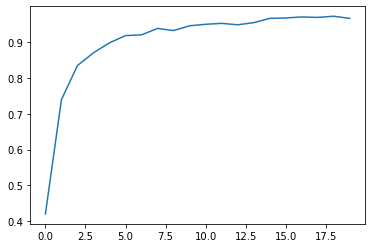

In [17]:
#Graph of accuracy
plt.plot(history.history['accuracy'])



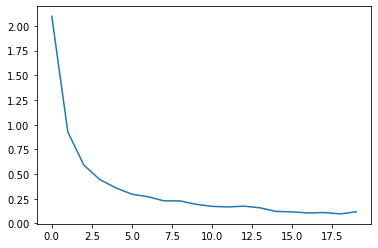

In [18]:
#Graph of loss
plt.plot(history.history['loss'])

In [19]:
#Test model with test data
test_history = model.evaluate(X_test_flattened,Y_test_labeled_arr)

53/53 [==============================] - 0s 1ms/step - loss: 0.2170 - accuracy: 0.9410


In [20]:
y_predicted = model.predict(X_test_flattened)

In [21]:
y_predicted[0]

array([9.0074082e-08, 2.9078168e-10, 9.9999046e-01, 7.0163384e-07,
       9.6105936e-13, 6.7975877e-13, 3.1053840e-10, 6.0082410e-09,
       7.9457441e-06, 3.0762956e-07, 8.3286616e-16, 4.6322297e-09,
       1.0444288e-08, 1.1218889e-10, 2.8522218e-10, 2.5775085e-11,
       4.6716096e-08, 4.1904154e-12, 2.4531062e-17, 3.2383079e-07],
      dtype=float32)

In [22]:
np.argmax(model.predict(X_test_flattened[0].reshape(1,400)))

2

Predicted:2
Truth:2


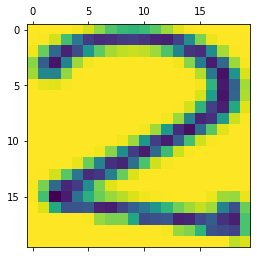

In [23]:
#Testing model manually
testIndex = 0
print("Predicted:"+str(np.argmax(y_predicted[testIndex])))
print("Truth:"+str(Y_test[testIndex]))
plt.matshow(X_test[testIndex])


In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [25]:
cm = tf.math.confusion_matrix(labels=Y_test_labeled_arr,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(20, 20), dtype=int32, numpy=
array([[126,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
          2,   0,   0,   0,   0,   0,   0],
       [  0, 123,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  90,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   3,   0, 124,   0,   0,   0,   0,   2,   2,   0,   0,
          0,   0,   1,   0,   2,   0,   1],
       [  0,   0,   0,   0,   0, 120,   1,   1,   1,   0,   0,   0,   0,
          1,   0,   2,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 109,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   2,   0,   0,   0, 133,   0,   0,   0,   0,   1,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0

Text(69.0, 0.5, 'Truth')

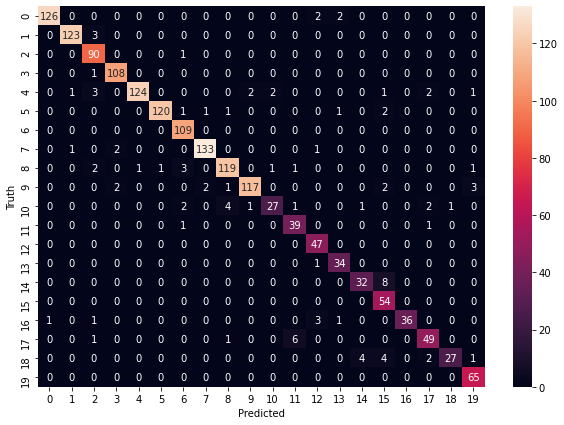

In [27]:
#Results of predictions
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
model.save(MODEL_PATH)

INFO:tensorflow:Assets written to: C:\Users\darko\Documents\DeepLearning\modelpath\assets


In [29]:
model = load_model(MODEL_PATH)

In [ ]:
model.evaluate(X_test_flattened,Y_test_labeled_arr)

In [34]:
#Chose random capthca files
captcha_image_files = list(paths.list_images(DATASET_FOR_TEST))
captcha_image_files = np.random.choice(captcha_image_files, size=(10,), replace=False)

In [ ]:
#Testing model with png files
for image_file in captcha_image_files:
    # Load the image and convert it to grayscale
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Add some extra padding around the image
    #image = cv2.copyMakeBorder(image, 20, 20, 20, 20, cv2.BORDER_REPLICATE)

    # threshold the image (convert it to pure black and white)
    thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # find the contours (continuous blobs of pixels) the image
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Hack for compatibility with different OpenCV versions
    contours = contours[0]

    letter_image_regions = []

    # Now we can loop through each of the four contours and extract the letter
    # inside of each one
    for contour in contours:
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)

        # Compare the width and height of the contour to detect letters that
        # are conjoined into one chunk
        if w / h > 1.25:
            # This contour is too wide to be a single letter!
            # Split it in half into two letter regions!
            half_width = int(w / 2)
            letter_image_regions.append((x, y, half_width, h))
            letter_image_regions.append((x + half_width, y, half_width, h))
        else:
            # This is a normal letter by itself
            letter_image_regions.append((x, y, w, h))

    # If we found more or less than 4 letters in the captcha, our letter extraction
    # didn't work correcly. Skip the image instead of saving bad training data!
    if len(letter_image_regions) != 4:
        continue

    # Sort the detected letter images based on the x coordinate to make sure
    # we are processing them from left-to-right so we match the right image
    # with the right letter
    letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

    # Create an output image and a list to hold our predicted letters
    output = cv2.merge([image] * 3)
    predictions = []

    for letter_bounding_box in letter_image_regions:
        # Grab the coordinates of the letter in the image
        x, y, w, h = letter_bounding_box

        # Extract the letter from the original image with a 2-pixel margin around the edge
        letter_image = image[y - 2:y + h + 2, x - 2:x + w + 2]
 
        letter_image = resize_to_fit(letter_image, 20, 20)
        
        
        prediction = np.argmax(model.predict(letter_image.reshape(1,400)))
        letter = list(labelDict.keys())[list(labelDict.values()).index(prediction)]
        
        predictions.append(letter)
        
        cv2.rectangle(output, (x - 2, y - 2), (x + w + 4, y + h + 4), (0, 255, 0), 1)
        cv2.putText(output, letter, (x - 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 255, 0), 2)
        
    captcha_text = "".join(predictions)
    print("CAPTCHA text is: {}".format(captcha_text))
        
    plt.matshow(output)
    cv2.waitKey()   


CAPTCHA text is: 1B5E
